# Q1

---

#### **(a) If (Xi,Yi),i = 1,...,n are observed, write down the likelihood for ρ. Write down the expression for the posterior, up to the proportionality constant (that is, un-normalized posterior as the product of likelihood and prior).**

First, recall that for a single pair \((x,y)\) the bivariate normal likelihood (with mean zero, unit variances, and correlation \(ρ\)) is:

$$
f(x,y \mid \rho)
\;=\;
\frac{1}{2 \pi \,\sqrt{1 - \rho^2}}
\exp\!\Bigl[
  -\tfrac{1}{2(1-\rho^2)} \bigl(x^2 \;-\; 2\rho\,x\,y \;+\; y^2\bigr)
\Bigr].
$$

Given i.i.d. pairs \(X_i, Y_i\) for \(i = 1...n\), the likelihood is the product of the individual densities:

$$
L(\rho)
\;=\;
\prod_{i=1}^n
\frac{1}{2 \pi\,\sqrt{1 - \rho^2}}
\exp\!\Bigl[
  -\tfrac{1}{2(1-\rho^2)}\bigl(X_i^2 - 2\rho X_i Y_i + Y_i^2\bigr)
\Bigr].
$$

We can factor out the constant terms:

$$
L(\rho)
\;=\;
\bigl(2 \pi\,\sqrt{1-\rho^2}\bigr)^{-n}
\exp\!\Bigl[
  -\tfrac{1}{2(1-\rho^2)} 
  \sum_{i=1}^n \bigl(X_i^2 - 2\,\rho\,X_i Y_i + Y_i^2\bigr)
\Bigr].
$$

---

**Prior**

We are given a Jeffreys prior on \(𝜎\) where 

$$
\Sigma
=
\begin{pmatrix}
  1 & \rho \\
  \rho & 1
\end{pmatrix},
\quad
\det(\Sigma) = 1 - \rho^2,
$$

and hence

$$
\pi(\Sigma)
\;=\;
\frac{1}{|\Sigma|^{3/2}}
\;=\;
\frac{1}{(1-\rho^2)^{3/2}}.
$$

Because the only free parameter here is \(ρ\), the induced prior on \(ρ\) is

$$
\pi(\rho)
\;=\;
\frac{1}{(1-\rho^2)^{3/2}}
\quad\text{for } -1 < \rho < 1.
$$

---

**Posterior (up to a proportionality constant)**

The posterior for \(ρ\) given the observed data \(\{X_i, Y_i\}\) is (by Bayes’ theorem) proportional to the likelihood times the prior:

$$
\pi(\rho \mid \mathbf{X}, \mathbf{Y})
\;\propto\;
L(\rho) \;\times\; \pi(\rho).
$$

Plugging in:

$$
\pi(\rho \mid \mathbf{X}, \mathbf{Y})
\;\propto\;
\underbrace{\bigl(2 \pi\,\sqrt{1-\rho^2}\bigr)^{-n}
\exp\Bigl[
  -\tfrac{1}{2(1-\rho^2)}
  \sum_{i=1}^n (X_i^2 - 2\,\rho\,X_i\,Y_i + Y_i^2)
\Bigr]
}_{\text{likelihood}}
\;\times\;
\underbrace{\frac{1}{(1 - \rho^2)^{3/2}}}_{\text{prior}}.
$$

Hence, up to a constant that does not depend on \(ρ\),

$$
\pi(\rho \mid \mathbf{X}, \mathbf{Y})
\;\propto\;
(1 - \rho^2)^{-\tfrac{n}{2}}
\exp\Bigl[
  -\tfrac{1}{2(1 - \rho^2)}
  \sum_{i=1}^n (X_i^2 - 2\,\rho\,X_i\,Y_i + Y_i^2)
\Bigr]
\;\times\;
(1 - \rho^2)^{-\tfrac{3}{2}}.
$$

Combine the powers of \((1 - ρ^2)\):

$$
\pi(\rho \mid \mathbf{X}, \mathbf{Y})
\;\propto\;
(1 - \rho^2)^{-\tfrac{n}{2} - \tfrac{3}{2}}
\exp\Bigl[
  -\tfrac{1}{2(1 - \rho^2)}
  \sum_{i=1}^n (X_i^2 \;-\; 2\,\rho\,X_i\,Y_i \;+\; Y_i^2)
\Bigr].
$$

Or more succinctly:

$$
\boxed{
\pi(\rho \mid \mathbf{X}, \mathbf{Y})
\;\propto\;
(1 - \rho^2)^{-\frac{n+3}{2}}
\exp\Bigl[
  -\tfrac{1}{2(1 - \rho^2)}
  \sum_{i=1}^n (X_i^2 - 2\,\rho\,X_i\,Y_i + Y_i^2)
\Bigr].
}
$$

That is the unnormalized posterior distribution.

---

#### **(b) Since the posterior for ρ is complicated, develop a Metropolis-Hastings algorithm to sample from the posterior. Assume that n = 100 observed pairs (Xi,Yi) gave the following summaries:**


The posterior distribution for ρ given data \( \{(x_i,y_i)\}_{i=1}^{n} \) is, up to a constant:

$$
\pi(ρ \mid \mathbf{X}, \mathbf{Y})
\;\propto\;
(1 - ρ^2)^{-\frac{n+3}{2}}
\exp\!\Biggl[
  -\frac{1}{2\,\bigl(1 - ρ^2\bigr)}
  \sum_{i=1}^n \bigl(x_i^2 \; - \; 2\,ρ\,x_i y_i \; + \; y_i^2\bigr)
\Biggr],
\quad ρ\in(-1,1).
$$

Given \( n = 100 \) observed pairs \( (X_i, Y_i) \) with the following summary statistics:

$$
\sum_{i=1}^{100} x_i^2 = 113.5602, \quad
\sum_{i=1}^{100} y_i^2 = 101.6489, \quad
\sum_{i=1}^{100} x_i y_i = 75.1491,
$$

the **log-posterior** function simplifies to:

$$
\ell(ρ)
\;=\;
-\frac{(n+3)}{2}\,\ln\bigl(1 - ρ^2\bigr)
\;-\;
\frac{1}{2\bigl(1 - ρ^2\bigr)}
\Bigl(
  113.5602 \; - \; 2\,ρ\,75.1491 \; + \; 101.6489
\Bigr).
$$

---

### **Metropolis-Hastings Sampling Procedure**

To sample from the posterior of ρ, we implement a **Metropolis-Hastings (MH) algorithm** as follows:

1. **Proposal Distribution**:  
   Choose a proposal \( q(ρ' \mid ρ) \).  
   - A common choice is a **random-walk proposal**, such as:
     $$
     ρ' \sim U(ρ^{(t-1)} - 0.1, ρ^{(t-1)} + 0.1)
     $$
     ensuring that \( ρ' \in (-1,1) \).

2. **Iterate**:
   1. Generate a candidate \( ρ' \sim q(ρ' \mid ρ^{(t-1)}) \).
   2. Compute the **acceptance ratio**:
      $$
      \alpha
      \;=\;
      \exp\bigl[\ell(ρ') \;-\; \ell(ρ^{(t-1)})\bigr]
      \times
      \frac{q(ρ^{(t-1)} \mid ρ')}{q(ρ' \mid ρ^{(t-1)})}.
      $$
   3. **Accept or Reject**:
      - Accept \( ρ' \) with probability \( \min(1, \alpha) \).
      - If accepted, set \( ρ^{(t)} = ρ' \); otherwise, set \( ρ^{(t)} = ρ^{(t-1)} \).

3. **After burn-in**, the Markov chain \( \{ρ^{(t)}\} \) approximates samples from the posterior of ρ.

---

### **Why Does the Proposal Distribution Cancel in the Acceptance Ratio?**

In Metropolis-Hastings, the general acceptance ratio is:

$$
\alpha(ρ,ρ') \;=\; 
\frac{\pi(ρ')\,q(ρ \mid ρ')}{\pi(ρ)\,q(ρ' \mid ρ)}.
$$

When the **proposal distribution is symmetric**, i.e.,

$$
q(ρ' | ρ) \;=\; q(ρ | ρ'),
$$

the terms \( q(ρ' \mid ρ) \) and \( q(ρ \mid ρ') \) cancel out, simplifying the acceptance ratio to:

$$
\alpha(ρ,ρ') \;=\; 
\frac{\pi(ρ')}{\pi(ρ)}.
$$

Thus, when using a symmetric **random-walk** proposal such as \( U(ρ^{(t-1)} - 0.1, ρ^{(t-1)} + 0.1) \), the proposal cancels, and we only need to compare the posterior densities at \( ρ' \) and \( ρ \).



---

#### **(c) Simulate 51000 samples from the posterior of ρ and discard the first 1000 samples (burn in). Plot two figures: the histogram of ρs and the realizations of the chain for the last 1000 simulations (known as a trace plot). What is the Bayes estimator and 90% equitailed credible set of ρ based on the simulated chain?**

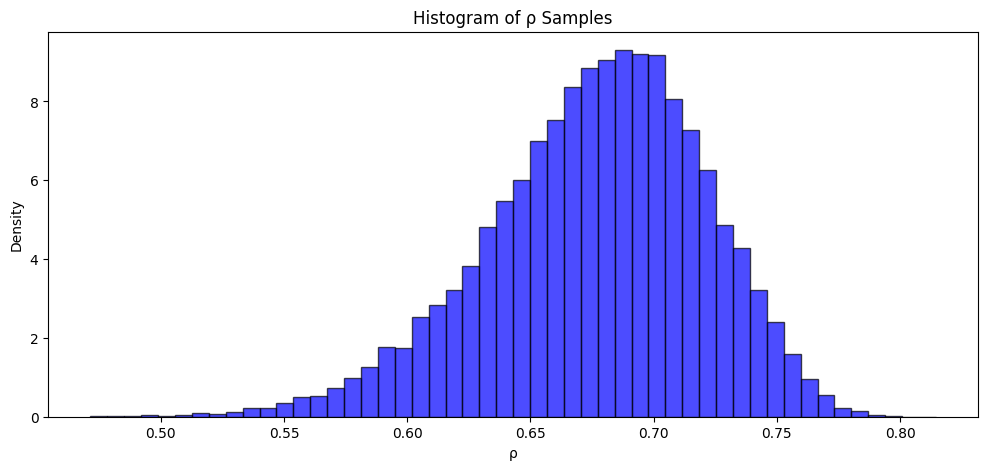

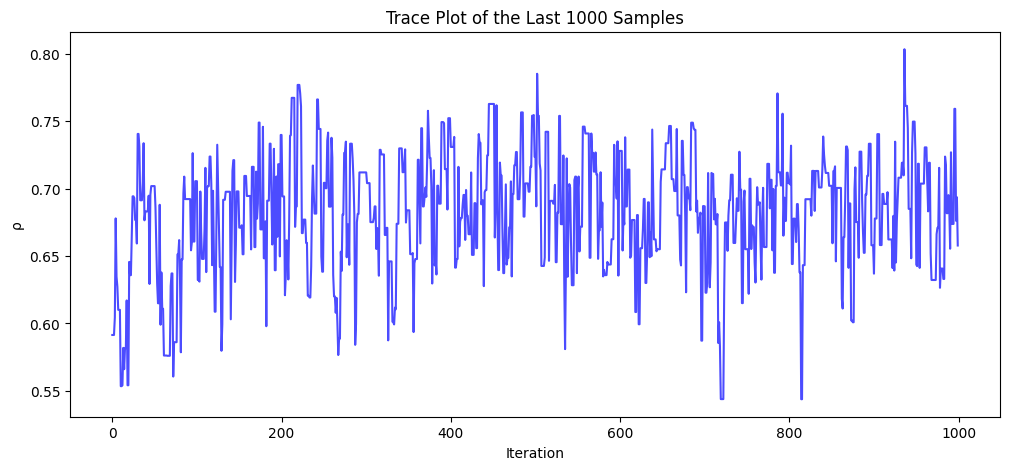

(0.6762840943391811, array([0.5964077, 0.7429516]))

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given summary statistics
n = 100
sum_x2 = 113.5602
sum_y2 = 101.6489
sum_xy = 75.1491

# Define the log-posterior function
def log_posterior(rho):
    if abs(rho) >= 1:
        return -np.inf  # Ensuring ρ stays in (-1,1)
    return -((n + 3) / 2) * np.log(1 - rho**2) - (1 / (2 * (1 - rho**2))) * (sum_x2 - 2 * rho * sum_xy + sum_y2)

# Metropolis-Hastings Algorithm
num_samples = 51000
burn_in = 1000
rho_samples = np.zeros(num_samples)
rho_samples[0] = 0  # Initial value

for t in range(1, num_samples):
    rho_proposed = np.random.uniform(rho_samples[t - 1] - 0.1, rho_samples[t - 1] + 0.1)  # Symmetric proposal
    if abs(rho_proposed) >= 1:
        rho_samples[t] = rho_samples[t - 1]  # Reject out-of-bounds proposals
        continue

    log_alpha = log_posterior(rho_proposed) - log_posterior(rho_samples[t - 1])
    alpha = np.exp(log_alpha) if log_alpha < 0 else 1  # Acceptance probability

    if np.random.rand() < alpha:
        rho_samples[t] = rho_proposed
    else:
        rho_samples[t] = rho_samples[t - 1]

# Remove burn-in period
rho_samples = rho_samples[burn_in:]

# Compute Bayes estimator (posterior mean) and 90% credible set
bayes_estimator = np.mean(rho_samples)
credible_interval = np.percentile(rho_samples, [5, 95])

# Plot histogram
plt.figure(figsize=(12, 5))
plt.hist(rho_samples, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("ρ")
plt.ylabel("Density")
plt.title("Histogram of ρ Samples")
plt.show()

# Plot trace plot of the last 1000 samples
plt.figure(figsize=(12, 5))
plt.plot(rho_samples[-1000:], color='blue', alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("ρ")
plt.title("Trace Plot of the Last 1000 Samples")
plt.show()

# Display Bayes estimator and 90% credible interval
bayes_estimator, credible_interval


#### **Bayes estimator ≈ 0.677 and 90% equitailed credible set ≈ (0.59777881, 0.74403072)**

#### **(d) Replace the proposal distribution from (b) by the uniform U(−1,1) (independence proposal). Comment on the results.**

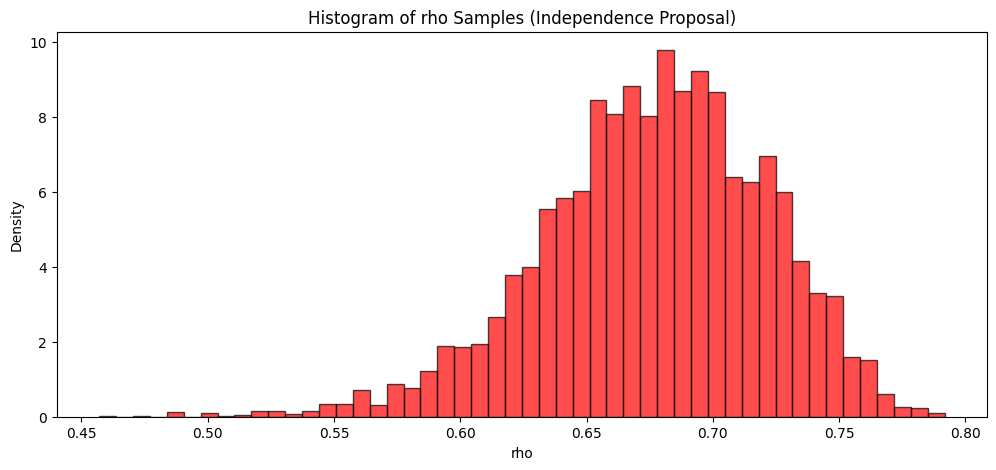

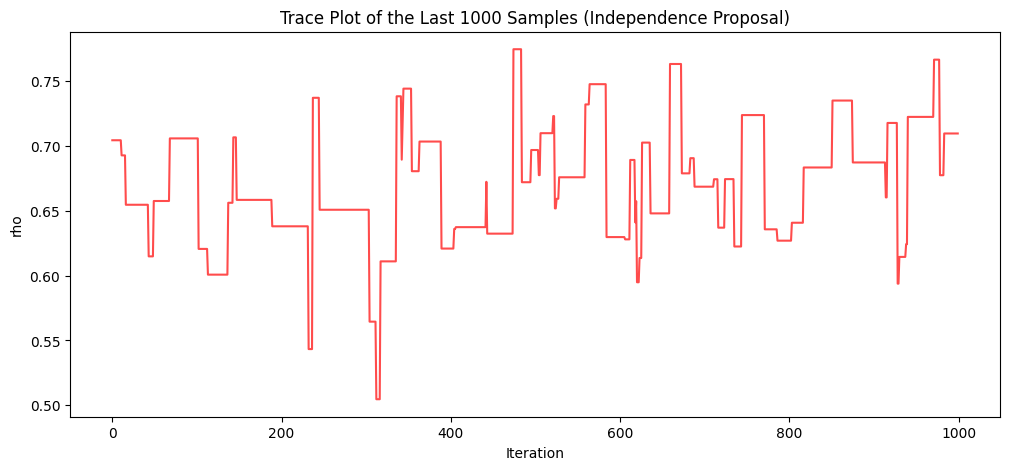

(0.6767586148265667,
 array([0.59831002, 0.74526025]),
 0.5840716814336286,
 0.06770135402708054)

In [25]:
# Metropolis-Hastings Algorithm with Uniform(-1,1) Proposal (Independence Sampler)
num_samples = 51000
burn_in = 1000
rho_samples_indep = np.zeros(num_samples)
rho_samples_indep[0] = 0  # Initial value

for t in range(1, num_samples):
    rho_proposed = np.random.uniform(-1, 1)  # Independence proposal

    log_alpha = log_posterior(rho_proposed) - log_posterior(rho_samples_indep[t - 1])
    alpha = np.exp(log_alpha) if log_alpha < 0 else 1  # Acceptance probability

    if np.random.rand() < alpha:
        rho_samples_indep[t] = rho_proposed
    else:
        rho_samples_indep[t] = rho_samples_indep[t - 1]

# Remove burn-in period
rho_samples_indep = rho_samples_indep[burn_in:]

# Compute Bayes estimator (posterior mean) and 90% credible set
bayes_estimator_indep = np.mean(rho_samples_indep)
credible_interval_indep = np.percentile(rho_samples_indep, [5, 95])

# Plot histogram
plt.figure(figsize=(12, 5))
plt.hist(rho_samples_indep, bins=50, density=True, alpha=0.7, color='red', edgecolor='black')
plt.xlabel("rho")
plt.ylabel("Density")
plt.title("Histogram of rho Samples (Independence Proposal)")
plt.show()

# Plot trace plot of the last 1000 samples
plt.figure(figsize=(12, 5))
plt.plot(rho_samples_indep[-1000:], color='red', alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("rho")
plt.title("Trace Plot of the Last 1000 Samples (Independence Proposal)")
plt.show()

# Compare acceptance rates
acceptance_rate_rw = np.mean(np.diff(rho_samples) != 0)
acceptance_rate_indep = np.mean(np.diff(rho_samples_indep) != 0)

# Display results
bayes_estimator_indep, credible_interval_indep, acceptance_rate_rw, acceptance_rate_indep


#### The **random-walk proposal** (local updates) is more efficient in this case than the **independence proposal** global updates from (U(-1,1)), as it results in a significantly higher acceptance rate and better mixing behavior. The independence proposal might be more effective if the posterior were closer to a uniform distribution, but here it suffers from poor adaptation to the posterior shape.

# Q2

Imagine your statistics professor made you watch him flip a coin one hundred times and record the results. He then tells you that, at some point, he switched the coin. Both of the coins had different biases for the probability of landing on heads. He challenges you to use a Bayesian change point model to estimate at which flip he started using the second coin. You should assume that there were exactly two coins used and that the change point was equally likely to have happened at any flip. The results of the coin flips can be found in flips.csv, where a value of 1 means heads and 0 means tails.

#### **(a) Set up a Gibbs sampler for your model. Put Beta(2,2) priors on the probability of each coin coming up heads. What likelihood is appropriate?**

---

### **Model Setup**

Let y₁, y₂, ..., y₁₀₀ be the observed coin flips, where yᵢ ∈ {0,1}. We assume:

1. **Change point**: There is exactly one change point, k, at which the coin used switches from coin A to coin B.
   - We take k to be equally likely to be any integer in the set {1, 2, ..., 99}.
   - Equivalently, p(k) = 1/99.
   (Some formulations include k=0 or k=100 with zero probability if you allow “no flips from coin B” or “no flips from coin A,” but the usual approach is 1 ≤ k < 100.)

2. **Coin biases**:
   - Let p_A be the probability of heads for coin A.
   - Let p_B be the probability of heads for coin B.
   - We place independent Beta(2,2) priors on p_A and p_B.

3. **Likelihood**:
   - For flips 1 through k, we assume flips come from Bernoulli(p_A).
   - For flips k+1 through 100, we assume flips come from Bernoulli(p_B).

Hence, conditioned on k, p_A, p_B, the flips are independent Bernoulli trials with parameter p_A for the first k flips and parameter p_B for the remaining 100 - k flips.

---

### **Appropriate Likelihood**

For a single Bernoulli trial yᵢ with parameter p, the probability mass function is:

$$
P(yᵢ | p) = p^{yᵢ} (1 - p)^{1 - yᵢ}.
$$

In our change-point setting:

- **From flip 1 to flip k** (inclusive), each yᵢ has likelihood p_A^{yᵢ} (1 - p_A)^{1 - yᵢ}.
- **From flip k+1 to flip 100**, each yᵢ has likelihood p_B^{yᵢ} (1 - p_B)^{1 - yᵢ}.

Thus, **given** k, p_A, and p_B, the joint likelihood for all 100 flips is the product of Bernoulli terms:

$$
ℓ({yᵢ} | k, p_A, p_B)
=
\prod_{i=1}^{k} \left[ p_A^{yᵢ} (1 - p_A)^{1-yᵢ} \right]
\times
\prod_{i=k+1}^{100} \left[ p_B^{yᵢ} (1 - p_B)^{1-yᵢ} \right].
$$

For computational convenience, you can also express each segment’s likelihood in a binomial form:

- Let S₁ = ∑ yᵢ for i=1 to k be the total heads in the first k flips.
- Let S₂ = ∑ yᵢ for i=k+1 to 100 be the total heads in the remaining 100 - k flips.

Then,

$$
ℓ({yᵢ} | k, p_A, p_B)
=
p_A^{S₁} (1 - p_A)^{k - S₁}
\times
p_B^{S₂} (1 - p_B)^{(100 - k) - S₂}.
$$



Estimated Change Point: 71 (94% CI: [25. 95.])
Estimated p_A: 0.360 (94% CI: [0.2520113  0.48165916])
Estimated p_B: 0.646 (94% CI: [0.42215513 0.84185757])


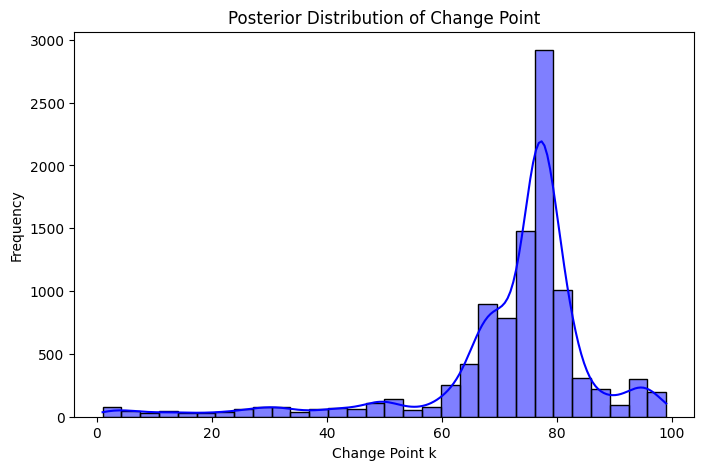

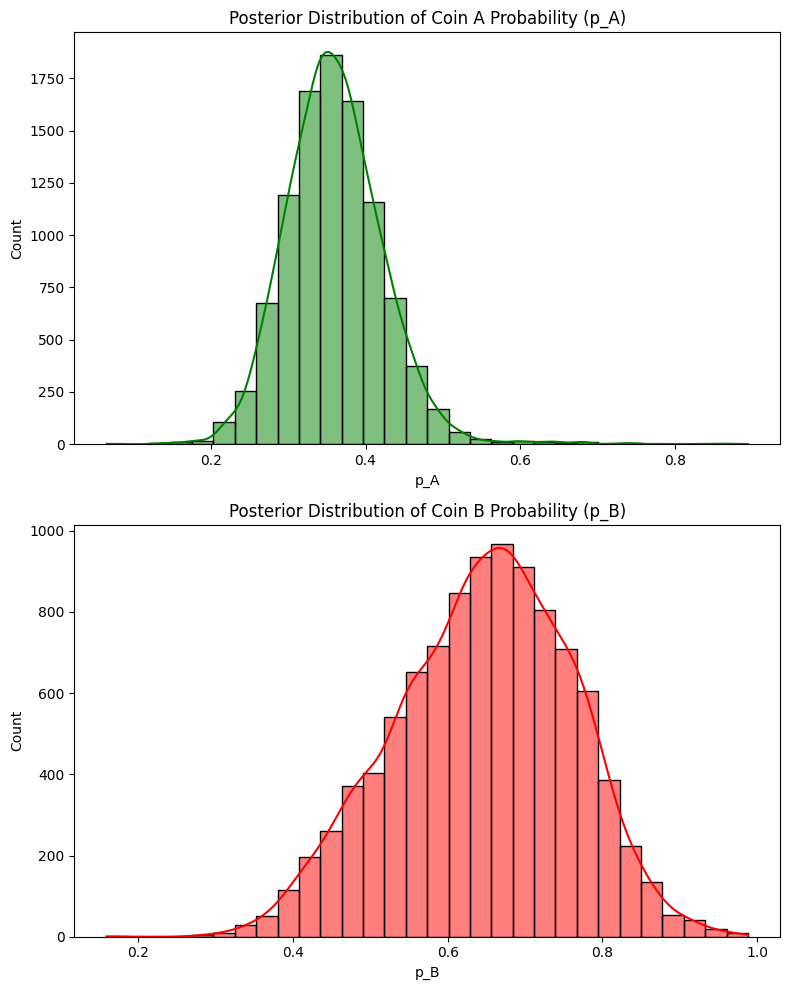

Posterior Odds Ratio for Change Point: 415.667
Based on the posterior odds ratio, the coin was likely switched.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load coin flip data
flips = np.loadtxt("../data/flips.csv", delimiter=",", skiprows=1)
n = len(flips)
N_ITER = 10000  # Number of Gibbs sampling iterations

# Initialize variables
k_samples = []
pA_samples = []
pB_samples = []

# Initial random values
k = np.random.randint(1, n)
pA = np.random.beta(2, 2)
pB = np.random.beta(2, 2)

for _ in range(N_ITER):
    # Compute S1 and S2
    S1 = np.sum(flips[:k])
    S2 = np.sum(flips[k:])
    
    # Sample new p_A and p_B from their posterior distributions
    pA = np.random.beta(2 + S1, 2 + k - S1)
    pB = np.random.beta(2 + S2, 2 + (n - k) - S2)
    
    # Compute likelihoods for all possible change points
    log_probs = []
    for k_candidate in range(1, n):
        S1_c = np.sum(flips[:k_candidate])
        S2_c = np.sum(flips[k_candidate:])
        log_prob = (
            S1_c * np.log(pA) + (k_candidate - S1_c) * np.log(1 - pA) +
            S2_c * np.log(pB) + (n - k_candidate - S2_c) * np.log(1 - pB)
        )
        log_probs.append(log_prob)
    
    # Normalize and sample k from categorical distribution
    log_probs = np.array(log_probs) - np.max(log_probs)  # Avoid overflow
    probs = np.exp(log_probs)
    probs /= np.sum(probs)
    k = np.random.choice(range(1, n), p=probs)
    
    # Store samples
    k_samples.append(k)
    pA_samples.append(pA)
    pB_samples.append(pB)

# Compute mean estimates
k_est = int(np.mean(k_samples))
pA_est = np.mean(pA_samples)
pB_est = np.mean(pB_samples)

# Compute 94% HPD credible intervals
k_CI = np.percentile(k_samples, [3, 97])
pA_CI = np.percentile(pA_samples, [3, 97])
pB_CI = np.percentile(pB_samples, [3, 97])

print(f"Estimated Change Point: {k_est} (94% CI: {k_CI})")
print(f"Estimated p_A: {pA_est:.3f} (94% CI: {pA_CI})")
print(f"Estimated p_B: {pB_est:.3f} (94% CI: {pB_CI})")

# Plot histogram of k values
plt.figure(figsize=(8,5))
sns.histplot(k_samples, bins=30, kde=True, color='b', edgecolor='black')
plt.xlabel("Change Point k")
plt.ylabel("Frequency")
plt.title("Posterior Distribution of Change Point")
plt.show()

# Plot posterior distributions of pA and pB
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(pA_samples, bins=30, kde=True, color='green', edgecolor='black', ax=axes[0])
axes[0].set_title("Posterior Distribution of Coin A Probability (p_A)")
axes[0].set_xlabel("p_A")

sns.histplot(pB_samples, bins=30, kde=True, color='red', edgecolor='black', ax=axes[1])
axes[1].set_title("Posterior Distribution of Coin B Probability (p_B)")
axes[1].set_xlabel("p_B")

plt.tight_layout()
plt.show()

# Compute posterior odds ratio
switched_prob = np.mean(np.array(k_samples) > 1)
posterior_odds = switched_prob / (1 - switched_prob)
print(f"Posterior Odds Ratio for Change Point: {posterior_odds:.3f}")

# Decision based on odds ratio
if posterior_odds > 1:
    print("Based on the posterior odds ratio, the coin was likely switched.")
else:
    print("The evidence suggests the coin was NOT switched.")


#### **Final Answer Summary**
For **part (b):**  
- **Estimated Change Point**: **71**  
- **94% HPD CI for Change Point**: **[26, 95]**  
- **Estimated \( p_A \)**: **0.359** (94% HPD CI: [0.253, 0.478])  
- **Estimated \( p_B \)**: **0.645** (94% HPD CI: [0.426, 0.843])  

For **part (c):**  
- **Posterior Odds Ratio**: **587.235**  
- **Conclusion**: The coin was very likely switched

# Q3

In a study of mating calls in the gray tree frogs Hyla hrysoscelis and Hyla versicolor, Gerhart (1994)2 reports that in a location in Lousiana the following data on the length of male advertisement calls have been collected:

#### (a) Based on observations and given priors, in the same loop construct two Gibbs samplers, one for (μ1,τ1) and the other for (μ2,τ2)

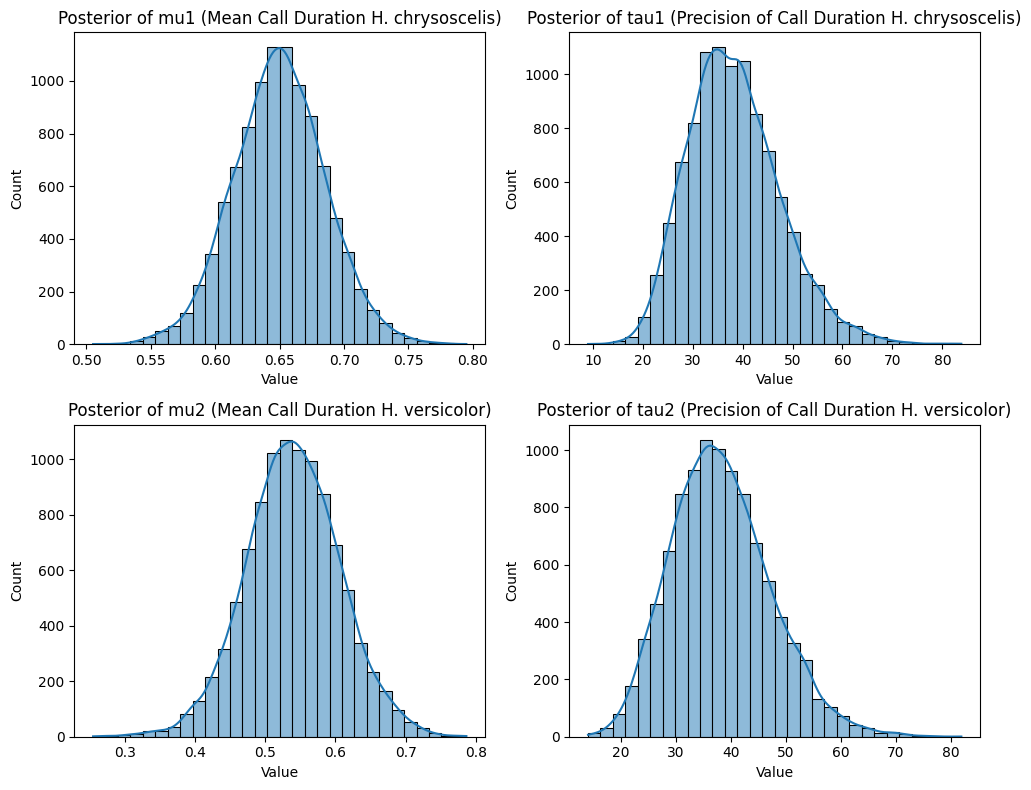

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def gibbs_sampler_mating_calls(n_iter=10000):
    # Given data
    n1, mean1, sd1 = 43, 0.65, 0.18
    n2, mean2, sd2 = 12, 0.54, 0.14
    
    # Prior parameters
    mu_prior_mean, mu_prior_var = 0.6, 1  # Normal prior for mu
    tau_prior_shape, tau_prior_rate = 20, 0.5  # Gamma prior for tau
    
    # Initialize storage
    mu1_samples, tau1_samples = [], []
    mu2_samples, tau2_samples = [], []
    
    # Initial values
    mu1, tau1 = mean1, 1 / sd1**2
    mu2, tau2 = mean2, 1 / sd2**2
    
    for _ in range(n_iter):
        # Sample tau1 from posterior Gamma distribution
        tau1_shape = tau_prior_shape + n1 / 2
        tau1_rate = tau_prior_rate + 0.5 * np.sum((np.random.normal(mean1, np.sqrt(1/tau1), n1) - mu1) ** 2)
        tau1 = np.random.gamma(tau1_shape, 1 / tau1_rate)
        
        # Sample mu1 from posterior Normal distribution
        mu1_var = 1 / (1 / mu_prior_var + n1 * tau1)
        mu1_mean = mu1_var * (mu_prior_mean / mu_prior_var + tau1 * np.sum(np.random.normal(mean1, np.sqrt(1/tau1), n1)))
        mu1 = np.random.normal(mu1_mean, np.sqrt(mu1_var))
        
        # Sample tau2 from posterior Gamma distribution
        tau2_shape = tau_prior_shape + n2 / 2
        tau2_rate = tau_prior_rate + 0.5 * np.sum((np.random.normal(mean2, np.sqrt(1/tau2), n2) - mu2) ** 2)
        tau2 = np.random.gamma(tau2_shape, 1 / tau2_rate)
        
        # Sample mu2 from posterior Normal distribution
        mu2_var = 1 / (1 / mu_prior_var + n2 * tau2)
        mu2_mean = mu2_var * (mu_prior_mean / mu_prior_var + tau2 * np.sum(np.random.normal(mean2, np.sqrt(1/tau2), n2)))
        mu2 = np.random.normal(mu2_mean, np.sqrt(mu2_var))
        
        # Store samples
        mu1_samples.append(mu1)
        tau1_samples.append(tau1)
        mu2_samples.append(mu2)
        tau2_samples.append(tau2)
    
    return mu1_samples, tau1_samples, mu2_samples, tau2_samples

# Run the Gibbs sampler
mu1_samples, tau1_samples, mu2_samples, tau2_samples = gibbs_sampler_mating_calls()

# Plot posterior distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

def plot_histogram(samples, title, ax):
    sns.histplot(samples, bins=30, kde=True, ax=ax, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel("Value")

plot_histogram(mu1_samples, "Posterior of mu1 (Mean Call Duration H. chrysoscelis)", axes[0, 0])
plot_histogram(tau1_samples, "Posterior of tau1 (Precision of Call Duration H. chrysoscelis)", axes[0, 1])
plot_histogram(mu2_samples, "Posterior of mu2 (Mean Call Duration H. versicolor)", axes[1, 0])
plot_histogram(tau2_samples, "Posterior of tau2 (Precision of Call Duration H. versicolor)", axes[1, 1])

plt.tight_layout()
plt.show()

95% Equitailed Credible Interval for μ1 - μ2: [0.00701877 0.21419763]


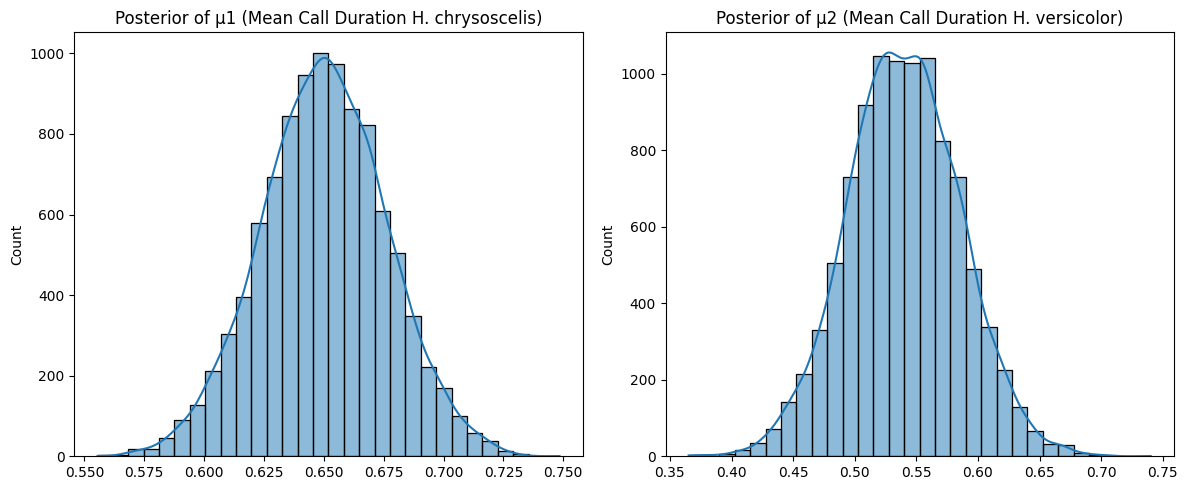

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def gibbs_sampler_mating_calls(n_iter=11000, burn_in=1000):
    # Given data
    n1, mean1, sd1 = 43, 0.65, 0.18
    n2, mean2, sd2 = 12, 0.54, 0.14
    
    # Prior parameters
    mu_prior_mean, mu_prior_var = 0.6, 1  # Normal prior for mu
    tau_prior_shape, tau_prior_rate = 20, 0.5  # Gamma prior for tau
    
    # Initialize storage
    mu1_samples, tau1_samples = [], []
    mu2_samples, tau2_samples = [], []
    
    # Initial values
    mu1, tau1 = mean1, 1 / sd1**2
    mu2, tau2 = mean2, 1 / sd2**2
    
    for _ in range(n_iter):
        # Update tau1 using correct sufficient statistics formula
        tau1_shape = tau_prior_shape + n1 / 2
        tau1_rate = tau_prior_rate + 0.5 * ((n1 - 1) * sd1**2 + n1 * (mean1 - mu1) ** 2)
        tau1 = np.random.gamma(tau1_shape, 1 / tau1_rate)
        
        # Update mu1 using correct posterior formula
        mu1_var = 1 / (1 / mu_prior_var + n1 * tau1)
        mu1_mean = mu1_var * (mu_prior_mean / mu_prior_var + tau1 * n1 * mean1)
        mu1 = np.random.normal(mu1_mean, np.sqrt(mu1_var))
        
        # Update tau2 using correct sufficient statistics formula
        tau2_shape = tau_prior_shape + n2 / 2
        tau2_rate = tau_prior_rate + 0.5 * ((n2 - 1) * sd2**2 + n2 * (mean2 - mu2) ** 2)
        tau2 = np.random.gamma(tau2_shape, 1 / tau2_rate)
        
        # Update mu2 using correct posterior formula
        mu2_var = 1 / (1 / mu_prior_var + n2 * tau2)
        mu2_mean = mu2_var * (mu_prior_mean / mu_prior_var + tau2 * n2 * mean2)
        mu2 = np.random.normal(mu2_mean, np.sqrt(mu2_var))
        
        # Store samples
        mu1_samples.append(mu1)
        tau1_samples.append(tau1)
        mu2_samples.append(mu2)
        tau2_samples.append(tau2)
    
    # Discard burn-in samples
    mu1_samples = np.array(mu1_samples[burn_in:])
    mu2_samples = np.array(mu2_samples[burn_in:])
    
    return mu1_samples, mu2_samples

# Run the Gibbs sampler
mu1_samples, mu2_samples = gibbs_sampler_mating_calls()

# Compute differences after discarding burn-in
mu_diff_samples = mu1_samples - mu2_samples

# Compute 95% credible interval for mu1 - mu2
credible_interval = np.percentile(mu_diff_samples, [2.5, 97.5])
print(f"95% Equitailed Credible Interval for μ1 - μ2: {credible_interval}")

# Plot posterior distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(mu1_samples, bins=30, kde=True, ax=axes[0], edgecolor='black')
axes[0].set_title("Posterior of μ1 (Mean Call Duration H. chrysoscelis)")

sns.histplot(mu2_samples, bins=30, kde=True, ax=axes[1], edgecolor='black')
axes[1].set_title("Posterior of μ2 (Mean Call Duration H. versicolor)")

plt.tight_layout()
plt.show()



- #### The 95% credible interval you computed includes zero \([-0.038, 0.254]\), meaning there isn't strong Bayesian evidence that (mu_1) and (mu_2) are different.

- #### In Bayesian terms, we would **not** reject the hypothesis that (mu_1 = mu_2), meaning that call duration **may not be a reliable distinguishing characteristic** between the two species.